# PCR

In [18]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import sklearn.model_selection as skm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

In [21]:
(X_train, X_test, y_train, y_test) = skm.train_test_split(data.drop(['log_price','price'], axis=1),
                                                          data['log_price'],
                                                          test_size=0.2,
                                                          random_state=0)

In [22]:
(x_train, x_val, Y_train, Y_val) = skm.train_test_split(X_train, y_train, 
                     test_size=0.2,
                     random_state=0)

In [23]:
num_components = np.arange(20, 201, 20)

train_scores = []
val_scores = []

for n in num_components:
    pca = PCA(n_components=n)
    linreg = LinearRegression()
    scaler = StandardScaler()

    pipe = Pipeline([('scaler', scaler), ('pca', pca), ('linreg', linreg)])
    pipe.fit(x_train, Y_train)
    
    y_train_pred = pipe.predict(x_train)
    train_mse = mean_squared_error(Y_train, y_train_pred)

    y_val_pred = pipe.predict(x_val)
    val_mse = mean_squared_error(Y_val, y_val_pred)

    train_scores.append(train_mse)
    val_scores.append(val_mse)

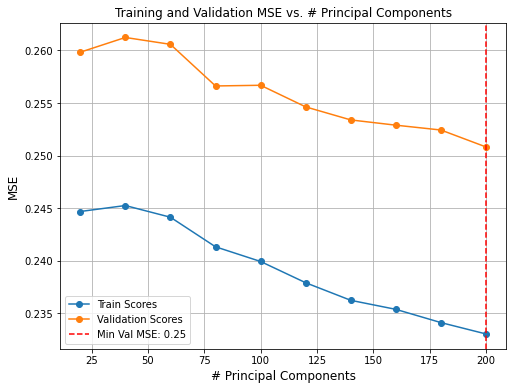

[0.2446908940985998, 0.2452579849050307, 0.24414676667561633, 0.2413360389553062, 0.23993964895556716, 0.23791881552825003, 0.23624853671273513, 0.23539016240835148, 0.23413094085320718, 0.2330503445495895]
[0.259829450624528, 0.2612320315105306, 0.2605784894840411, 0.2566226153381518, 0.2566882496847815, 0.25463392843271404, 0.2533938773596142, 0.25289479651648594, 0.2524350332296148, 0.25082338766148]


In [24]:
plt.figure(figsize=(8, 6))
plt.plot(num_components, train_scores, label='Train Scores', marker='o')
plt.plot(num_components, val_scores, label='Validation Scores', marker='o')

min_val_index = np.argmin(val_scores)
min_val_components = num_components[min_val_index]

plt.axvline(x=min_val_components, color='red', linestyle='--', label=f'Min Val MSE: {val_scores[min_val_index]:.2f}')

plt.xlabel('# Principal Components', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.title('Training and Validation MSE vs. # Principal Components')
plt.legend()
plt.grid(True)
plt.show()

print(train_scores)
print(val_scores)

In [31]:
pca = PCA(n_components=num_components[np.argmin(val_scores)])
linreg = LinearRegression()
scaler = StandardScaler(with_mean=True, with_std=True)
pipe = Pipeline([('scaler', scaler), ('pca', pca), ('linreg', linreg)])
pipe.fit(X_train, y_train)

train_pred = pipe.predict(X_train)
train_mse = mean_squared_error(y_train, train_pred)

test_pred = pipe.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)

In [32]:
print("The number of PCs that achieve the lowest MSE:", num_components[np.argmin(val_scores)])
print("Training MSE with PCR:", train_mse)
print("Test MSE with PCR:", test_mse)

The number of PCs that achieve the lowest MSE: 200
Training MSE with PCR: 0.23624793469684627
Test MSE with PCR: 0.24525682291028444


In [33]:
explained_var_ratios = pipe.named_steps['pca'].explained_variance_ratio_

In [34]:
table = pd.DataFrame({
    'Princiapl Component': np.arange(1, len(explained_var_ratios)+1),
    'Explained Variance Ratio': explained_var_ratios,
    'Cumulative Explained Variance': np.cumsum(explained_var_ratios)
})
print(table)

     Princiapl Component  Explained Variance Ratio  \
0                      1                  0.016539   
1                      2                  0.014240   
2                      3                  0.011443   
3                      4                  0.009045   
4                      5                  0.008844   
..                   ...                       ...   
195                  196                  0.004220   
196                  197                  0.004220   
197                  198                  0.004220   
198                  199                  0.004220   
199                  200                  0.004220   

     Cumulative Explained Variance  
0                         0.016539  
1                         0.030778  
2                         0.042222  
3                         0.051267  
4                         0.060110  
..                             ...  
195                       0.883415  
196                       0.887635  
197               